In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os 

rewards


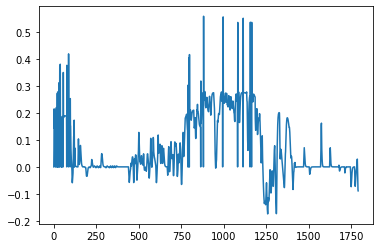

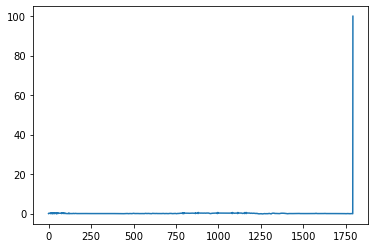

angle


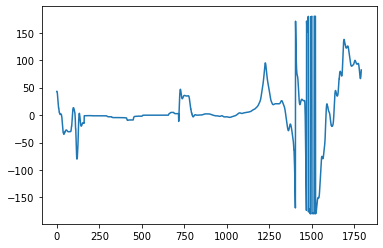

dirt


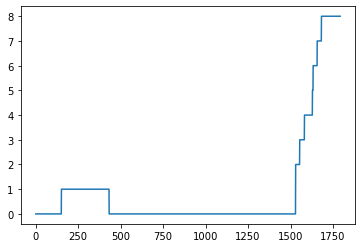

forward


In [ ]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
file = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\NDTRAIN.npy", allow_pickle=True)[1][:]

labels = ["rewards", "angle", "dirt", "forward", "left", "back", "right", "jump", "sneak", "sprint", "attack", "camera", "place"]

for i in range(len(overall)):
    print(labels[i])
    if i == 0: 
        plt.plot(file[i][:-1])
        plt.show()
    plt.plot(file[i])
    plt.show()


